In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 24

@author: yaning
"""

import HH as HH
import importlib
import numpy as np
import matplotlib.pyplot as plt

In [13]:
importlib.reload(HH)

<module 'HH' from '/home/yaning/Documents/Spiking_NN/HH.py'>

In [14]:
deltaTms = 0.05
Cm = 1
Vm = 0
pointCount = 5000
voltages = np.empty(pointCount)
times = np.arange(pointCount) * 0.05
stim = np.zeros(pointCount)
stim[1200:3800] = 20  # create a square pulse


In [15]:
# gate states for voltage gated channels
# they share the same m,n,h
m = HH.Gate(0,0,0)
n = HH.Gate(0,0,0)
h = HH.Gate(0,0,0)

sodium_channel = HH.Voltage_Sodium(120, 1, 115, Vm)
potassium_channel = HH.Voltage_Potassium(26, 1, -12, Vm)
leaky_channel = HH.Voltage_Leak(0.3, 1, 10.6, Vm)

# m.init_update(m, n, h, deltaTms)
# n.init_update(m, n, h, deltaTms)

for i in range(len(times)):

    sodium_channel.update_gP(m, n, h, deltaTms)
    potassium_channel.update_gP(m, n, h, deltaTms)

    INa = sodium_channel.current()
    IK = potassium_channel.current()
    Ileak = leaky_channel.current()

    Isum = stim[i] - INa - IK - Ileak
    Vm += deltaTms * Isum / Cm

    voltages[i] = Vm

    sodium_channel.Vm = Vm
    potassium_channel.Vm = Vm
    leaky_channel.Vm = Vm




0.011178186229231502
0.027107126437768535
0.03734645374498493
0.04408763855317982
0.04866998310755545
0.05191577814275093
0.05433206462401263
0.05623277665785211
0.05781306676124124
0.059194741393659184
0.06045415153327891
0.06163937959028808
0.06278086947257891
0.06389802463142348
0.06500331759172855
0.06610485815426796
0.06720800364810013
0.06831637181740308
0.06943247999406739
0.07055814974829197
0.07169476393530322
0.07284343059261078
0.07400508791440943
0.07518057188517624
0.07637066022542795
0.07757610131538874
0.07879763361641805
0.08003599912031695
0.0812919530951856
0.08256627159529696
0.08385975769307047
0.08517324706756776
0.08650761337896856
0.08786377372980111
0.0892426944344117
0.09064539727122911
0.09207296636704627
0.09352655585205662
0.09500739842459745
0.09651681497301878
0.09805622541751065
0.09962716095658282
0.10123127793129338
0.10287037355585207
0.1045464038069132
0.10626150381721271
0.10801801118419511
0.1098184926835275
0.11166577497426947
0.11356298000127193
0

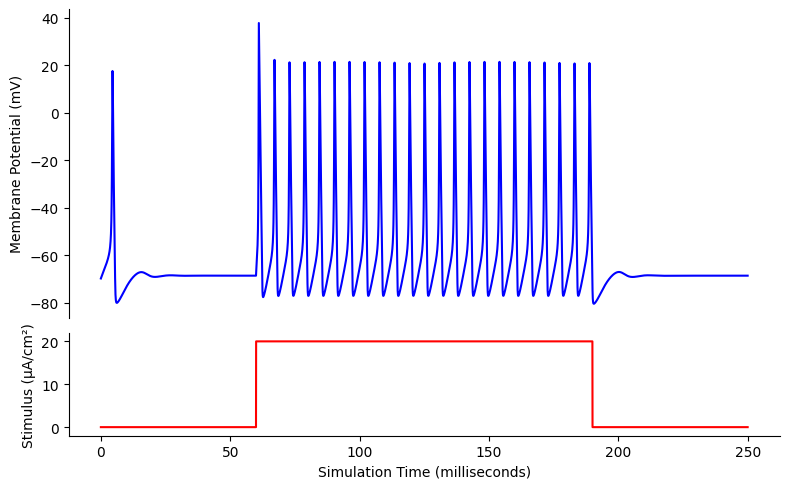

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5),
                                gridspec_kw={'height_ratios': [3, 1]})

ax1.plot(times, voltages - 70, 'b')
ax1.set_ylabel("Membrane Potential (mV)")
# ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)

ax2.plot(times, stim, 'r')
ax2.set_ylabel("Stimulus (µA/cm²)")
ax2.set_xlabel("Simulation Time (milliseconds)")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.margins(0, 0.1)
plt.tight_layout()
# plt.savefig("dev/concept4.png")
plt.show()

In [13]:
voltages

array([0.15900336, 0.31576091, 0.47063907, ..., 1.34588156, 1.3458793 ,
       1.34587708])